In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("/content/iris with Decesion tree classifier.csv")

In [5]:
df.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

 Split The Data into Train and Test

In [7]:
 x=df.iloc[:,1:5].values
 y=df.iloc[:,-1].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Using decision Tree Classifier 

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
#Predict the result 
print(classifier.predict(sc.transform([[4.7,3.1,1.3,0.2]])))


['Iris-setosa']


In [12]:
y_pred=classifier.predict(x_test)

Confusin Matrix

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)


In [14]:
print(cm)
accuracy_score(y_test,y_pred)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


0.9777777777777777

In [15]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [16]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



Visualize the Training Data

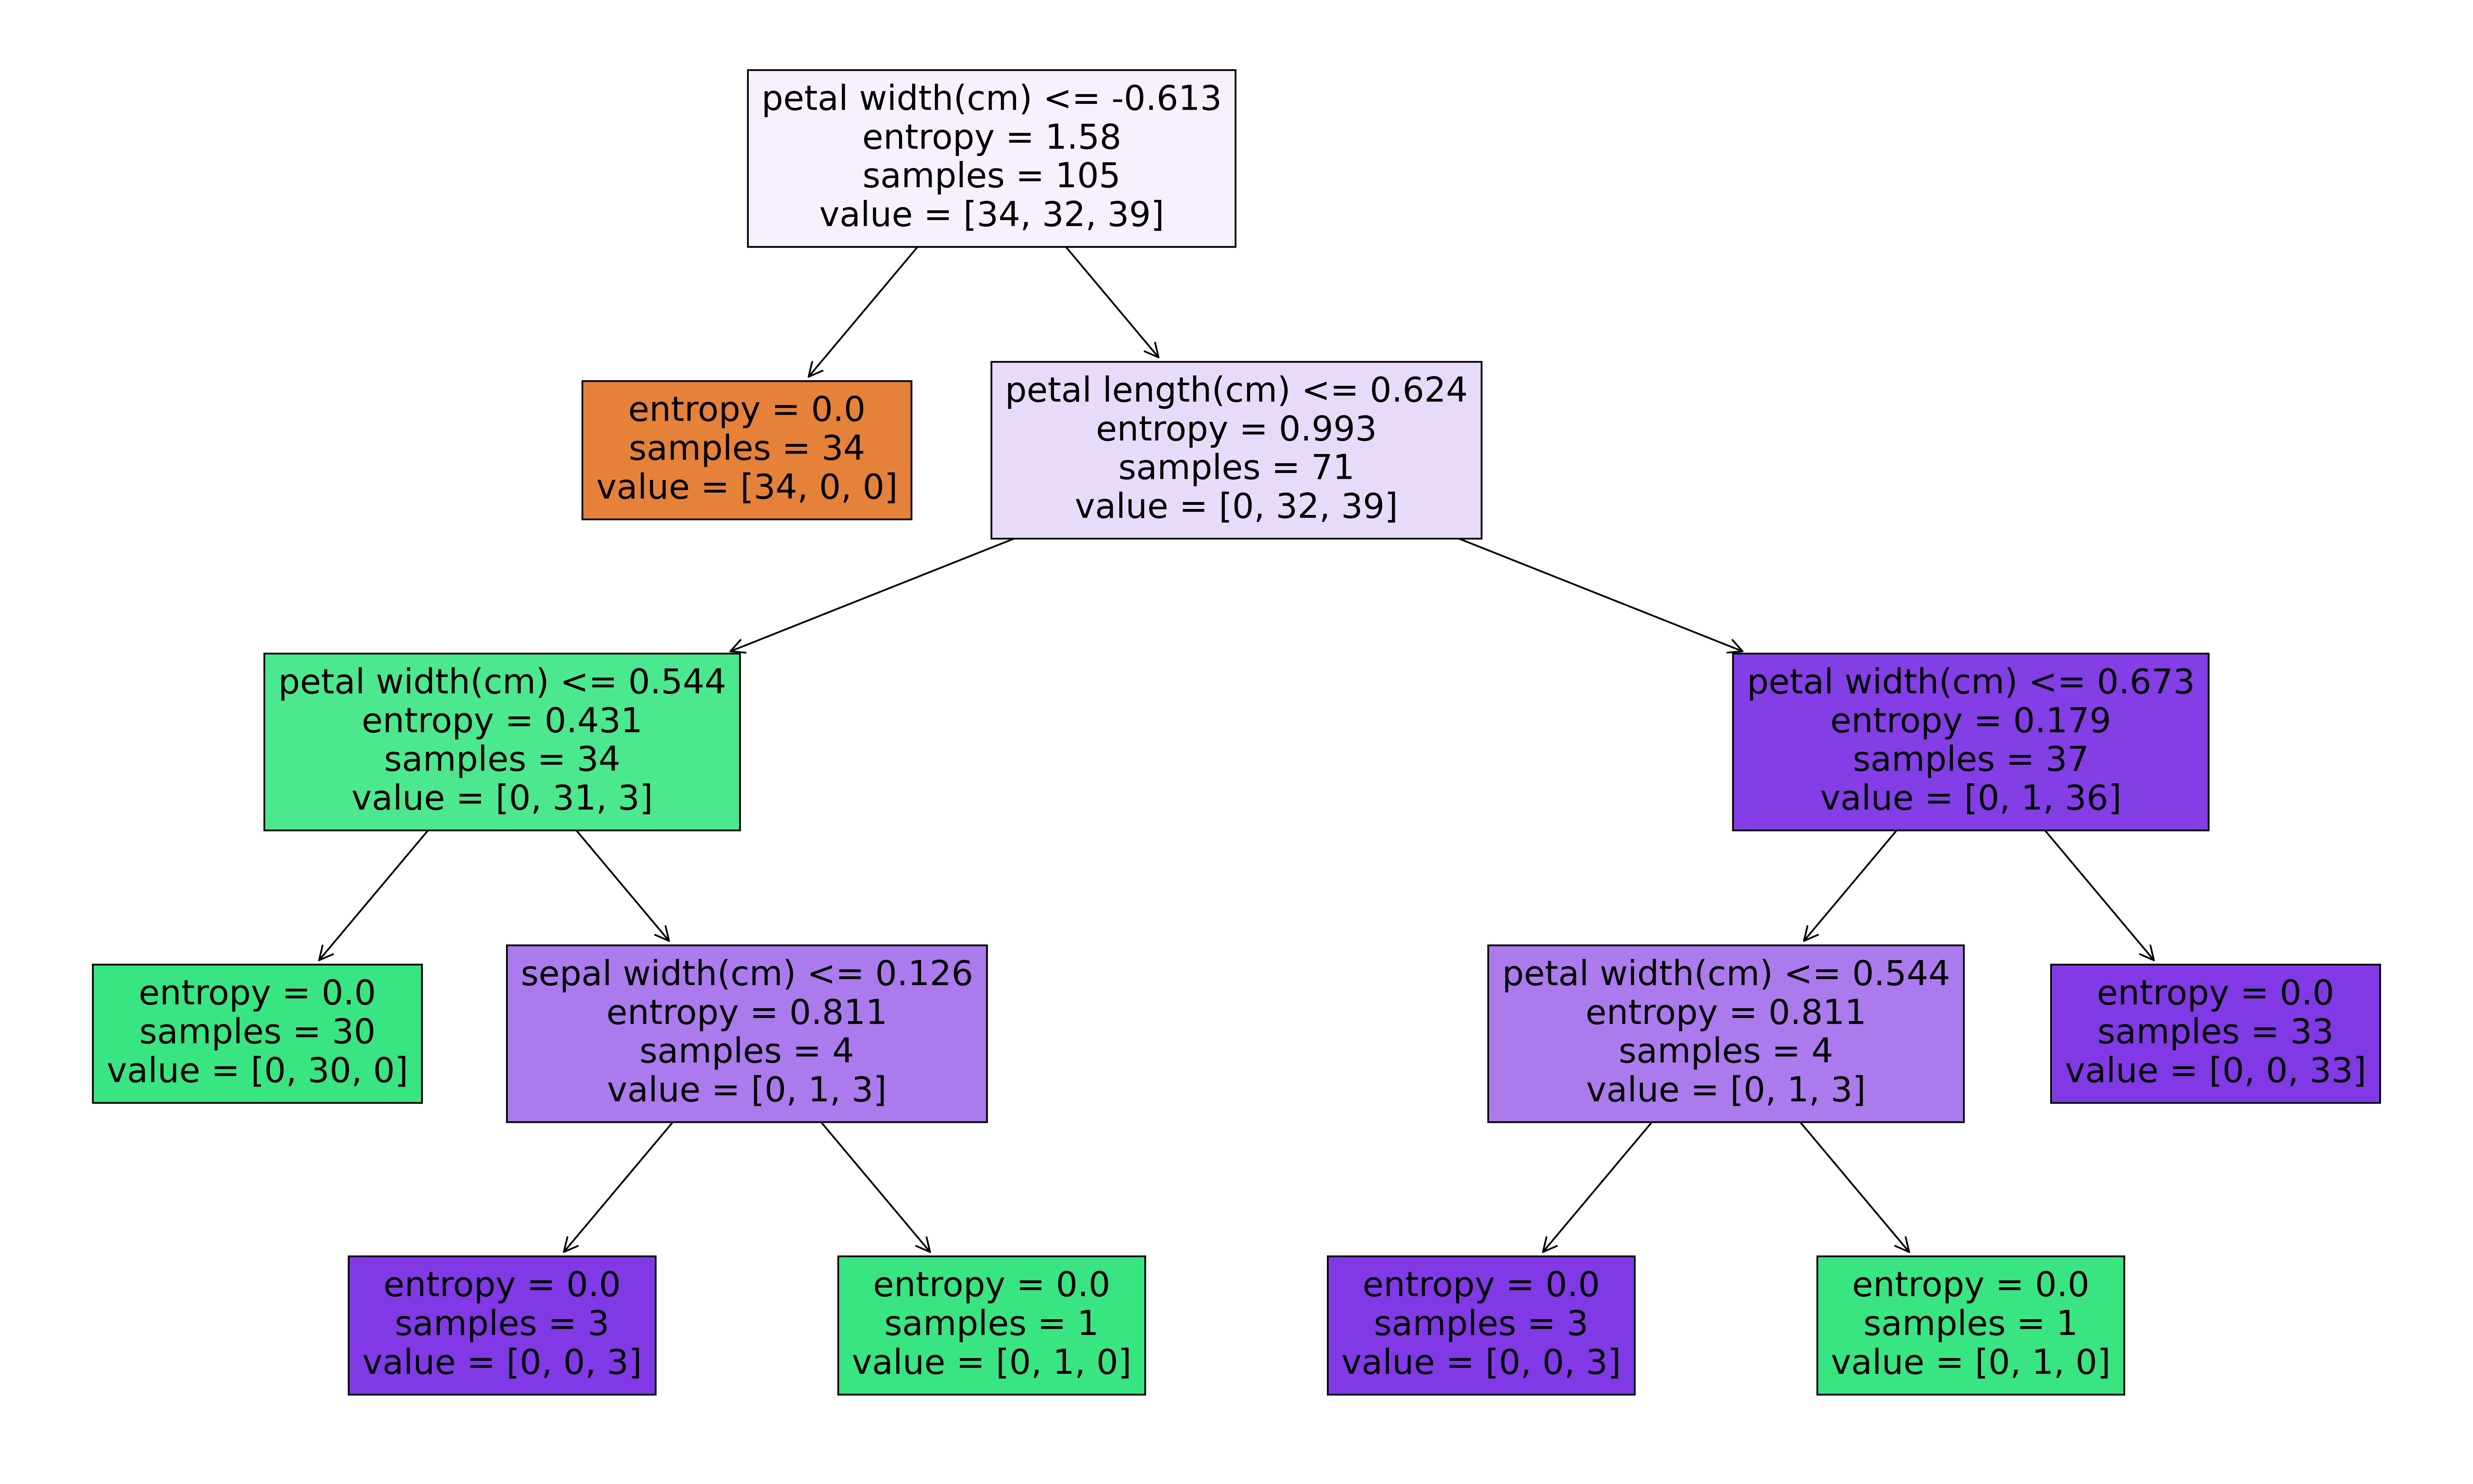

In [21]:
from sklearn import tree
fn=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
cn=['setosa','versicolor','virginica' ]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(25,15),dpi=400)
tree.plot_tree(classifier,feature_names=fn,filled=True);
fig.savefig('imagename.png')